# EDA : Explanatory Data Analysis

In [1]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [2]:
price = pd.read_csv('price.csv')

In [3]:
# Tipe Datanya : DataFrame (df)
print(type(price))
# Ukuran Data
N, P = price.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 936, ', Kolom = ', 10)

In [4]:
price.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [5]:
price.tail()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
935,936,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


In [6]:
price.sample(5)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
725,726,10989.0,13153.0,13797.0,1645.0,1958.0,Covered,CAT B,530,9336000
95,96,6541.0,7537.0,11474.0,1694.0,NaN,Covered,CAT B,560,4830000
620,621,9935.0,15807.0,18595.0,1847.0,2186.0,Not Provided,CAT B,910,7512000
97,98,6194.0,8473.0,11978.0,1590.0,1912.0,Open,CAT B,830,6535000
299,300,7097.0,13252.0,13997.0,1313.0,1586.0,Covered,CAT C,420,4594000


In [7]:
price.columns

Index(['Observation', 'Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet',
       'Builtup', 'Parking', 'City_Category', 'Rainfall', 'House_Price'],
      dtype='object')

## Menghapus varabel/kolom/fitur

In [8]:
# Drop kolom pertama karena tidak berguna (hanya index)
price.drop("Observation", axis=1, inplace=True)

## Mengoreksi tipe kolom/variabel

In [9]:
price.info()
#melihat tipe data setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dist_Taxi      923 non-null    float64
 1   Dist_Market    923 non-null    float64
 2   Dist_Hospital  935 non-null    float64
 3   Carpet         928 non-null    float64
 4   Builtup        921 non-null    float64
 5   Parking        936 non-null    object 
 6   City_Category  936 non-null    object 
 7   Rainfall       936 non-null    int64  
 8   House_Price    936 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.9+ KB


In [10]:
price.dtypes

Dist_Taxi        float64
Dist_Market      float64
Dist_Hospital    float64
Carpet           float64
Builtup          float64
Parking           object
City_Category     object
Rainfall           int64
House_Price        int64
dtype: object

In [11]:
# mengubah tipe data object pada kolom 'Parking' & 'City_Category' menjadi tipe data category
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price.dtypes

Dist_Taxi         float64
Dist_Market       float64
Dist_Hospital     float64
Carpet            float64
Builtup           float64
Parking          category
City_Category    category
Rainfall            int64
House_Price         int64
dtype: object

In [12]:
#mengecek apakah ada duplikat data?
print(price.shape)
price.duplicated().sum()

(936, 9)


4

In [13]:
#menghapus entri yang memiliki data duplikat 
price.drop_duplicates(inplace=True)
print(price.duplicated().sum()) # no more duplicates
print(price.shape) # re-check by printing data size

0
(932, 9)


## memilih beberapa kolom

In [14]:
# Memilih hanya variable dengan tipe tertentu
price_num = price.select_dtypes(include = ['float64', 'int64'])
price_num.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000


In [15]:
# Memilih hanya variable dengan tipe tertentu
price_cat = price.select_dtypes(include = ['category'])
price_cat.head()

,Parking,City_Category
0,Open,CAT B
1,Not Provided,CAT B
2,Not Provided,CAT A
3,Covered,CAT B
4,Not Provided,CAT B


## Dummy Variabel

In [16]:
df = pd.get_dummies(price['Parking'], prefix='Park')
df.head()

,Park_Covered,Park_No Parking,Park_Not Provided,Park_Open
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,True,False,False,False
4,False,False,True,False


## Menggabungkan ke data awal

In [17]:
df2 = pd.concat([price, df], axis = 1)
df2.head().transpose()

,0,1,2,3,4
Dist_Taxi,9796.0,8294.0,11001.0,8301.0,10510.0
Dist_Market,5250.0,8186.0,14399.0,11188.0,12629.0
Dist_Hospital,10703.0,12694.0,16991.0,12289.0,13921.0
Carpet,1659.0,1461.0,1340.0,1451.0,1770.0
Builtup,1961.0,1752.0,1609.0,1748.0,2111.0
Parking,Open,Not Provided,Not Provided,Covered,Not Provided
City_Category,CAT B,CAT B,CAT A,CAT B,CAT B
Rainfall,530,210,720,620,450
House_Price,6649000,3982000,5401000,5373000,4662000
Park_Covered,False,False,False,True,False


## Memilih data secara manual

In [18]:
X = price[['House_Price','Dist_Market']] 
X[:7]

,House_Price,Dist_Market
0,6649000,5250.0
1,3982000,8186.0
2,5401000,14399.0
3,5373000,11188.0
4,4662000,12629.0
5,4526000,5142.0
6,7224000,11869.0


## Visualisasi Data

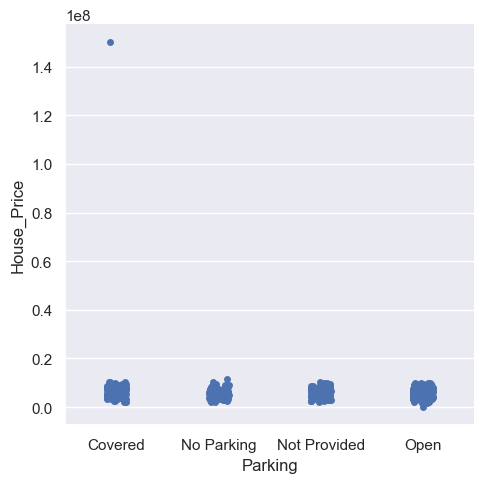

In [19]:
p= sns.catplot(x="Parking", y="House_Price", data=price)
#menggunakan category plot

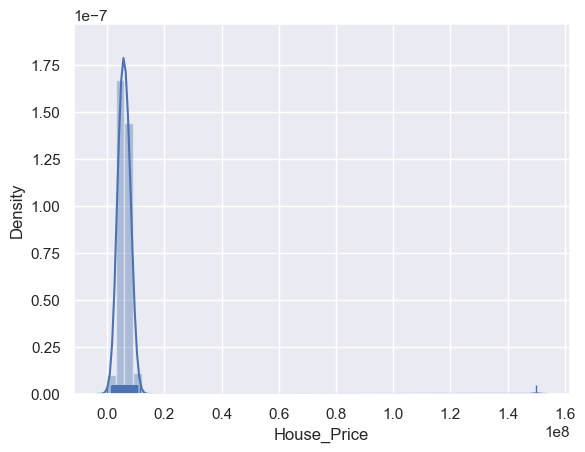

In [20]:
p = sns.distplot(price['House_Price'], kde=True, rug=True)
#menggunakan distribution plot

Dari visualisasi diatas didapat bahwa visualisasi dengan plot kategori dan plot distribusi tidak dapat bekerja karena terdapat outlier, Outliers dapat menyebabkan distorsi dalam analisis statistik dan visualisasi data jika tidak diidentifikasi dan dikelola dengan benar 

In [21]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "harga"

df = np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())
print(df.shape)
df.head()

(932,)


0    True
1    True
2    True
3    True
4    True
Name: House_Price, dtype: bool

hasil dari perhitungan diatas menghasilkan
setiap baris akan berisi nilai boolean yang menunjukkan 
apakah nilai kolom House_Price pada baris tersebut masuk dalam kriteria tersebut 
atau tidak.

In [22]:
price2 = price[df] # Data tanpa outliers
print(price2.shape, price.shape)
# price = data dengan outlier
# price2 = data dengan tidak ada outlier

(931, 9) (932, 9)


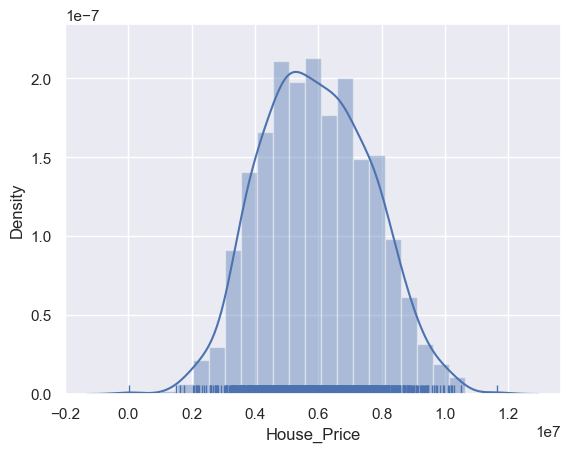

In [23]:
p = sns.distplot(price2['House_Price'], kde=True, rug=True)


Dari hasil visualisasi diatas menunjukkan sebagian besar
harga rumah berada di kisaran 4 juta - 6 juta.

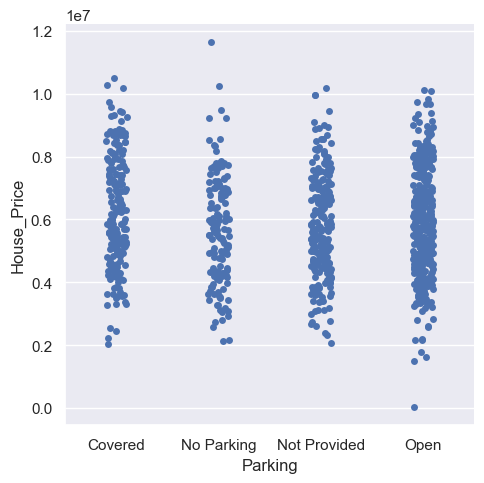

In [24]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)


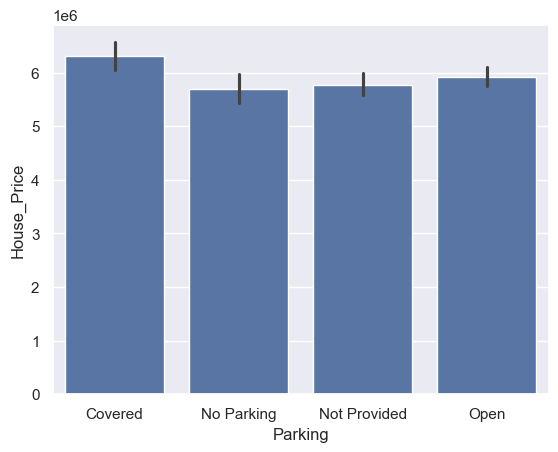

In [25]:
p= sns.barplot(x="Parking", y="House_Price", data=price2)


Dari hasil visualisasi diatas menunjukkan hubungan antara jenis tempat parkir dan harga rumah. Terlihat bahwa rumah dengan tempat parkir tertutup memiliki harga rata-rata yang lebih tinggi dibandingkan dengan jenis tempat parkir lainnya.

## Missing Value

In [26]:
print(price2.isnull().sum())

Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64


In [27]:
set(price2['Parking'])


{'Covered', 'No Parking', 'Not Provided', 'Open'}

## Visualisasi Data Missing Value

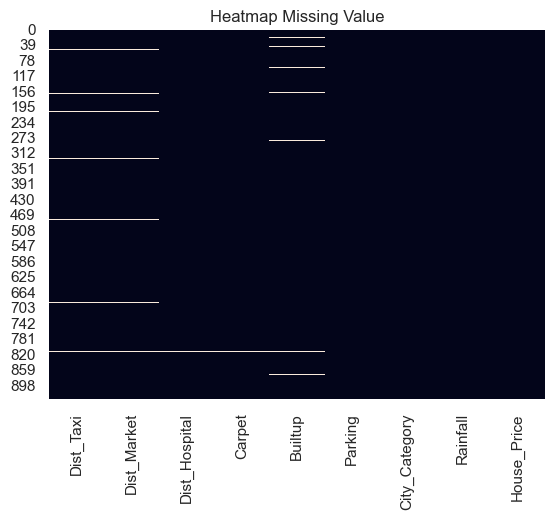

In [28]:
sns.heatmap(price2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [29]:
(price2.isnull().sum()/len(price2)).to_frame('persentase missing')
#menghitung persentase nilai yang hilang (missing values) dalam setiap kolom dari dataset price2.

,persentase missing
Dist_Taxi,0.013963
Dist_Market,0.013963
Dist_Hospital,0.001074
Carpet,0.008593
Builtup,0.016112
Parking,0.000000
City_Category,0.000000
Rainfall,0.000000
House_Price,0.000000


In [30]:
# drop rows with missing values : Ada berbagai cara
# X = price.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
# price2.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
# price2.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
# price2.dropna(subset=['Dist_Hospital'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
price2.dropna(inplace=True)

In [31]:
print(price2.isnull().sum())


Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
dtype: int64


## Statistika Deskriptif

In [32]:
price2.describe()
#mendapatkan ringkasan statistik dari kolom-kolom numerik dalam dataset

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,8.970000e+02
mean,8234.092531,11014.810479,13086.516165,1485.586399,1782.282051,785.340022,5.932165e+06
std,2526.851636,2528.087365,2567.090681,250.153381,299.795462,266.956895,1.720409e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,-110.000000,1.492000e+06
25%,6486.000000,9367.000000,11302.000000,1317.000000,1576.000000,600.000000,4.638000e+06
50%,8230.000000,11161.000000,13192.000000,1477.000000,1774.000000,780.000000,5.860000e+06
75%,9963.000000,12675.000000,14860.000000,1653.000000,1985.000000,970.000000,7.183000e+06
max,16850.000000,18281.000000,22407.000000,2229.000000,2667.000000,1560.000000,1.163200e+07


In [33]:
# Statistika Sederhana dari data "Numerik"-nya
price2.describe(include='all')

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
count,897.000000,897.000000,897.000000,897.000000,897.000000,897,897,897.000000,8.970000e+02
unique,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Open,CAT B,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,353,347,NaN,NaN
mean,8234.092531,11014.810479,13086.516165,1485.586399,1782.282051,NaN,NaN,785.340022,5.932165e+06
std,2526.851636,2528.087365,2567.090681,250.153381,299.795462,NaN,NaN,266.956895,1.720409e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,NaN,NaN,-110.000000,1.492000e+06
25%,6486.000000,9367.000000,11302.000000,1317.000000,1576.000000,NaN,NaN,600.000000,4.638000e+06
50%,8230.000000,11161.000000,13192.000000,1477.000000,1774.000000,NaN,NaN,780.000000,5.860000e+06
75%,9963.000000,12675.000000,14860.000000,1653.000000,1985.000000,NaN,NaN,970.000000,7.183000e+06


In [34]:
# ini adalah parameter tambahan jika kita juga ingin mendapatkan statistik sederhana seluruh datanya
# (termasuk data kategorik)
price[['Dist_Taxi','Parking']].describe(include='all')

,Dist_Taxi,Parking
count,919.000000,932
unique,NaN,4
top,NaN,Open
freq,NaN,372
mean,8229.727965,NaN
std,2561.985008,NaN
min,146.000000,NaN
25%,6476.000000,NaN
50%,8230.000000,NaN
75%,9937.000000,NaN


## Distribusi nilai pada setiap variabel/kolom kategorik

In [35]:
# get all unique values of a variable/column
for col in price_cat.columns:
    print(col,': ', set(price[col].unique()))

Parking :  {'Covered', 'No Parking', 'Open', 'Not Provided'}
City_Category :  {'CAT A', 'CAT B', 'CAT C'}


In [36]:
price['Parking'].unique()


['Open', 'Not Provided', 'Covered', 'No Parking']
Categories (4, object): ['Covered', 'No Parking', 'Not Provided', 'Open']

In [37]:
# Jika yang dibutuhkan memang hanya nama kolom, maka kita bisa melakukan hal ini untuk menghemat penggunaan memory
numVar = price.select_dtypes(include = ['float64', 'int64']).columns
list(numVar)

['Dist_Taxi',
 'Dist_Market',
 'Dist_Hospital',
 'Carpet',
 'Builtup',
 'Rainfall',
 'House_Price']

In [38]:
# Distribusi tiap data
price['Parking'].value_counts()

Parking
Open            372
Not Provided    227
Covered         188
No Parking      145
Name: count, dtype: int64

## Contingency Tables

In [39]:
CT = pd.crosstab(index=price2["City_Category"], columns=price2["Parking"])
CT

Parking,Covered,No Parking,Not Provided,Open
City_Category,,,,
CAT A,72,50,80,115
CAT B,59,51,88,149
CAT C,49,40,55,89


## Data Grouping

In [40]:
price2[price2["City_Category"] == "CAT B"].describe()
# Bisa ditambahkan .drop("Parking", axis=1) untuk menghilangkan kolom dengan single value

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,3.470000e+02
mean,8079.703170,10693.945245,12855.314121,1500.380403,1799.806916,780.259366,5.520006e+06
std,2475.693863,2534.441833,2588.293527,252.359775,301.620757,260.422493,1.324843e+06
min,604.000000,4950.000000,4922.000000,869.000000,1050.000000,0.000000,2.130000e+06
25%,6400.500000,8891.000000,11088.500000,1317.000000,1577.500000,590.000000,4.613500e+06
50%,7998.000000,10711.000000,12950.000000,1487.000000,1787.000000,770.000000,5.438000e+06
75%,9794.000000,12535.000000,14685.000000,1688.000000,2023.500000,950.000000,6.369000e+06
max,15082.000000,17101.000000,19617.000000,2214.000000,2647.000000,1560.000000,9.661000e+06


## Saving (preprocessed) Data

In [41]:
price2.to_csv("price_PreProcessed.csv", encoding='utf8')
